In [2]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Collecting data

url_tv_strategy = "http://161.97.165.206:57895/services/tv_internal_strategy"
data = pd.read_json(url_tv_strategy)

data.tail(5)

,time,Supertrend_$time,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,Supertrend_indicator,SMA_30_$time,SMA_30_MA,SMA_30_Smoothing_Line,SMA_30_indicator,...,candle_min,candle_volume,candle_indicator,round,round_position,round_position_value,round_close_at,round_lock_price,round_close_price,round_noroundid
996,1667613240,1667613240,354.50,353.726259,1.000000e+100,Supertrend,1667613240,355.070000,354.978000,SMA_30,...,354.3,36.59,candle,117835,Bear,0,2022-11-05 02:00:40,354.45,354.14614807,
997,1667613060,1667613060,354.70,353.726259,1.000000e+100,Supertrend,1667613060,355.036667,354.928667,SMA_30,...,354.3,184.76,candle,117834,Bear,0,2022-11-05 01:55:31,354.69129196,354.45,
998,1667612700,1667612700,354.20,353.726259,1.000000e+100,Supertrend,1667612700,354.926667,354.849333,SMA_30,...,353.9,246.59,candle,117833,Bull,1,2022-11-05 01:50:22,353.87956293,354.69129196,
999,1667612340,1667612340,354.45,353.726259,1.000000e+100,Supertrend,1667612340,354.823333,354.801333,SMA_30,...,353.9,132.57,candle,117832,Bear,0,2022-11-05 01:45:13,354.82084141,353.87956293,
1000,1667612160,1667612160,355.15,353.726259,1.000000e+100,Supertrend,1667612160,354.833333,354.793333,SMA_30,...,355.0,98.45,candle,117831,Bear,0,2022-11-05 01:40:01,355.24746137,354.82084141,


In [4]:
# Remove unused columns
data.drop([
    'time',
    'Supertrend_$time',
    'Supertrend_indicator',
    'SMA_30_$time',
    'SMA_30_indicator',
    'SMA_50_$time',
    'SMA_50_indicator',
    'SMA_100_$time',
    'SMA_100_indicator',
    'SMA_200_$time',
    'SMA_200_indicator',
    'EMA_30_$time',
    'EMA_30_indicator',
    'EMA_50_$time',
    'EMA_50_indicator',
    'EMA_100_$time',
    'EMA_100_indicator',
    'EMA_200_$time',
    'EMA_200_indicator',
    'RSI_$time',
    'RSI_indicator',
    'RSI_Upper_Bollinger_Band',
    'RSI_Lower_Bollinger_Band',
    'RSI_fill_1_colorer',
    'Stochastic_$time',
    'Stochastic_indicator',
    'Bollinger_Bands_$time',
    'Bollinger_Bands_indicator',
    'ATR_$time',
    'ATR_indicator',
    'candle_time',
    'candle_indicator',
    'round',
    'round_position',
    'round_close_at',
    'round_lock_price',
    'round_close_price'], axis=1, inplace=True)

data.tail(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
996,354.50,353.726259,1.000000e+100,355.070000,354.978000,354.556,354.4860,353.739,353.7392,353.1720,...,356.563862,353.556138,0.627444,354.4,354.6,354.6,354.3,36.59,0,
997,354.70,353.726259,1.000000e+100,355.036667,354.928667,354.524,354.4492,353.742,353.7386,353.1500,...,356.595326,353.604674,0.663827,354.9,354.5,354.9,354.3,184.76,0,
998,354.20,353.726259,1.000000e+100,354.926667,354.849333,354.452,354.3788,353.737,353.7318,353.1110,...,356.652667,353.697333,0.689909,353.9,354.5,354.7,353.9,246.59,1,
999,354.45,353.726259,1.000000e+100,354.823333,354.801333,354.372,354.3028,353.736,353.7104,353.0825,...,356.598431,353.971569,0.686308,355.0,353.9,355.0,353.9,132.57,0,
1000,355.15,353.726259,1.000000e+100,354.833333,354.793333,354.352,354.2608,353.734,353.6952,353.0725,...,356.504904,354.155096,0.640342,355.3,355.0,355.4,355.0,98.45,0,


In [5]:
data.head(1)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
0,325.0,320.543369,1.000000e+100,323.853333,323.903333,324.24,324.1888,325.474,325.577,326.3525,...,326.25204,320.36796,1.4772,325.0,325.2,325.2,324.5,59.28,,FIRST


In [6]:
# Set maindataset
main_data = data.copy()

In [7]:
# Separate FIRST to prediction set and remove from main data set, also remove round_noroundid column
data_prediction = main_data.loc[main_data['round_noroundid'] == 'FIRST'].copy()
data_prediction.drop(['round_noroundid'], axis=1, inplace=True)

main_data.drop(main_data[main_data['round_noroundid'] == 'FIRST'].index, inplace=True)
main_data.drop(['round_noroundid'], axis=1, inplace=True)

# Convert round position value (future y) to float
# main_data['round_position_value'] = pd.to_numeric(main_data['round_position_value'])
main_data['round_position_value'] = main_data['round_position_value'].astype(float)

data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
0,325.0,320.543369,1.000000e+100,323.853333,323.903333,324.24,324.1888,325.474,325.577,326.3525,...,323.31,326.25204,320.36796,1.4772,325.0,325.2,325.2,324.5,59.28,


In [8]:
main_data.head(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
1,325.10,320.543369,1.000000e+100,323.866667,323.944667,324.216,324.1800,325.529,325.6352,326.3125,...,323.225,326.039161,320.410839,1.563556,325.1,325.1,325.4,324.3,378.92,1.0
2,323.15,320.543369,1.000000e+100,323.926667,324.016667,324.158,324.1852,325.624,325.7602,326.2020,...,323.245,326.114477,320.375523,1.661180,322.2,324.1,324.2,322.0,391.71,1.0
3,323.80,320.543369,1.000000e+100,324.060000,324.070667,324.196,324.2288,325.765,325.9022,326.1490,...,323.520,326.745275,320.294725,1.434790,322.9,324.7,324.8,322.8,277.53,0.0
4,323.55,320.543369,1.000000e+100,324.033333,324.090000,324.198,324.2624,325.825,325.9772,326.1275,...,323.560,326.861757,320.258243,1.371989,324.1,323.0,324.1,323.0,172.79,0.0
5,322.85,318.907893,1.000000e+100,324.103333,324.194000,324.248,324.3904,325.974,326.1560,326.0870,...,323.625,326.940343,320.309657,1.413567,321.2,324.5,324.8,321.2,540.98,1.0


In [9]:
main_data.dtypes

Supertrend_Plot           float64
Supertrend_Up_Trend       float64
Supertrend_Down_Trend     float64
SMA_30_MA                 float64
SMA_30_Smoothing_Line     float64
SMA_50_MA                 float64
SMA_50_Smoothing_Line     float64
SMA_100_MA                float64
SMA_100_Smoothing_Line    float64
SMA_200_MA                float64
SMA_200_Smoothing_Line    float64
EMA_30_EMA                float64
EMA_30_Smoothing_Line     float64
EMA_50_EMA                float64
EMA_50_Smoothing_Line     float64
EMA_100_EMA               float64
EMA_100_Smoothing_Line    float64
EMA_200_EMA               float64
EMA_200_Smoothing_Line    float64
RSI_RSI                   float64
RSI_RSIbased_MA           float64
Stochastic_K              float64
Stochastic_D              float64
Bollinger_Bands_Basis     float64
Bollinger_Bands_Upper     float64
Bollinger_Bands_Lower     float64
ATR_ATR                   float64
candle_open               float64
candle_close              float64
candle_max    

In [10]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = main_data.drop("round_position_value", axis=1)

# The y (dependent or label) is charges column
y = main_data["round_position_value"]

# Remove from data_prediction the empty round_position_value
data_prediction.drop("round_position_value", axis=1, inplace=True)

In [11]:
X.head()

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
1,325.10,320.543369,1.000000e+100,323.866667,323.944667,324.216,324.1800,325.529,325.6352,326.3125,...,72.670763,323.225,326.039161,320.410839,1.563556,325.1,325.1,325.4,324.3,378.92
2,323.15,320.543369,1.000000e+100,323.926667,324.016667,324.158,324.1852,325.624,325.7602,326.2020,...,58.827957,323.245,326.114477,320.375523,1.661180,322.2,324.1,324.2,322.0,391.71
3,323.80,320.543369,1.000000e+100,324.060000,324.070667,324.196,324.2288,325.765,325.9022,326.1490,...,56.129032,323.520,326.745275,320.294725,1.434790,322.9,324.7,324.8,322.8,277.53
4,323.55,320.543369,1.000000e+100,324.033333,324.090000,324.198,324.2624,325.825,325.9772,326.1275,...,44.193548,323.560,326.861757,320.258243,1.371989,324.1,323.0,324.1,323.0,172.79
5,322.85,318.907893,1.000000e+100,324.103333,324.194000,324.248,324.3904,325.974,326.1560,326.0870,...,26.451613,323.625,326.940343,320.309657,1.413567,321.2,324.5,324.8,321.2,540.98


In [12]:
y.head(20)

1     1.0
2     1.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    1.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    0.0
19    1.0
20    1.0
Name: round_position_value, dtype: float64

In [13]:
data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
0,325.0,320.543369,1.000000e+100,323.853333,323.903333,324.24,324.1888,325.474,325.577,326.3525,...,76.768732,323.31,326.25204,320.36796,1.4772,325.0,325.2,325.2,324.5,59.28


In [14]:
# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((800, 32), (800,))

In [16]:
X_test.shape, y_test.shape

((200, 32), (200,))

In [17]:
# Normalize data


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Supertrend_Plot",
        "Supertrend_Up_Trend",
        "Supertrend_Down_Trend",
        "SMA_30_MA",
        "SMA_30_Smoothing_Line",
        "SMA_50_MA",
        "SMA_50_Smoothing_Line",
        "SMA_100_MA",
        "SMA_100_Smoothing_Line",
        "SMA_200_MA",
        "SMA_200_Smoothing_Line",
        "EMA_30_EMA",
        "EMA_30_Smoothing_Line",
        "EMA_50_EMA",
        "EMA_50_Smoothing_Line",
        "EMA_100_EMA",
        "EMA_100_Smoothing_Line",
        "EMA_200_EMA",
        "EMA_200_Smoothing_Line",
        "RSI_RSI",
        "RSI_RSIbased_MA",
        "Stochastic_K",
        "Stochastic_D",
        "Bollinger_Bands_Basis",
        "Bollinger_Bands_Upper",
        "Bollinger_Bands_Lower",
        "ATR_ATR",
        "candle_open",
        "candle_close",
        "candle_max",
        "candle_min",
        "candle_volume"]) # turn all values in these columns between 0 and 1
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
data_prediction_normal = ct.transform(data_prediction)

In [89]:
X_train.head(1), X_train_normal[0]

(    Supertrend_Plot  Supertrend_Up_Trend  Supertrend_Down_Trend  SMA_30_MA  \
 30            323.6        1.000000e+100              325.52211     326.06   
 
     SMA_30_Smoothing_Line  SMA_50_MA  SMA_50_Smoothing_Line  SMA_100_MA  \
 30                326.302    326.842               327.0904     329.117   
 
     SMA_100_Smoothing_Line  SMA_200_MA  ...  Stochastic_D  \
 30                329.2016     328.298  ...     10.828283   
 
     Bollinger_Bands_Basis  Bollinger_Bands_Upper  Bollinger_Bands_Lower  \
 30                325.285              327.36949              323.20051   
 
      ATR_ATR  candle_open  candle_close  candle_max  candle_min  candle_volume  
 30  0.776633        323.6         323.6       324.2       323.4          120.3  
 
 [1 rows x 32 columns],
 array([2.11764706e-001, 1.00000000e+000, 4.16030411e-100, 1.75292290e-001,
        1.80533495e-001, 1.65989822e-001, 1.70581385e-001, 1.27242625e-001,
        1.28984817e-001, 7.29296831e-002, 7.95668550e-002, 1.307

In [127]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=250, verbose=0)

In [128]:
# Evaluate the model
model_1.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 804us/step - loss: 0.5690 - accuracy: 0.7250


[0.5689765214920044, 0.7250000238418579]

In [129]:
model_1.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 6)                 198       
                                                                 
 dense_124 (Dense)           (None, 6)                 42        
                                                                 
 dense_125 (Dense)           (None, 1)                 7         
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


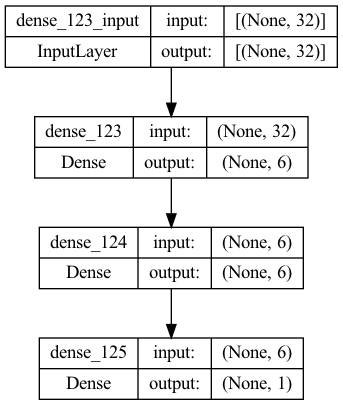

In [130]:
plot_model(model_1, show_shapes=True)

In [131]:
# Evaluate our insurance model trained on normalized data

model_1.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7250


[0.5689765214920044, 0.7250000238418579]

Text(0.5, 1.0, 'Model loss curves')

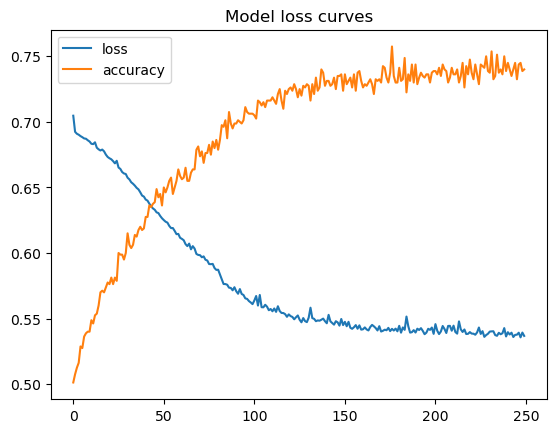

In [132]:
# Plot the loss curves
pd.DataFrame(history_training_model_1.history).plot()
plt.title("Model loss curves")

In [133]:
# Try and make a prediction using our model
y_pred = model_1.predict(data_prediction_normal)
y_pred

1/1 [==============================] - 0s 31ms/step


array([[0.832019]], dtype=float32)

In [134]:
y_pred[0][0]

0.832019